<a href="https://colab.research.google.com/github/donw385/DS-Sprint-01-Dealing-With-Data/blob/master/module3-basicdatavisualizations/LS_DS_113_Plotting_Playground.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

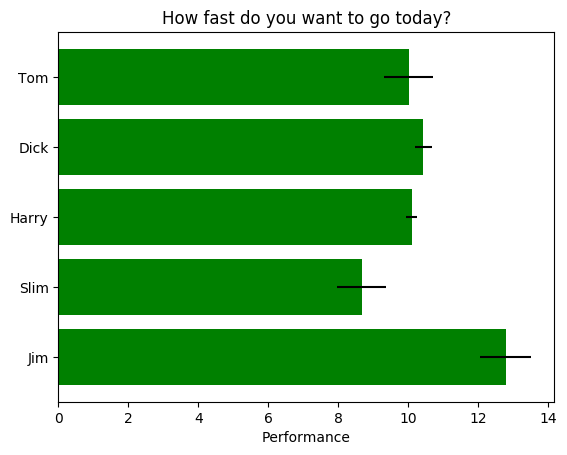

In [5]:
# https://matplotlib.org/gallery/lines_bars_and_markers/barh.html#sphx-glr-gallery-lines-bars-and-markers-barh-py
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')
y_pos = np.arange(len(people))
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

ax.barh(y_pos, performance, xerr=error, align='center',
        color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('How fast do you want to go today?')

plt.show()

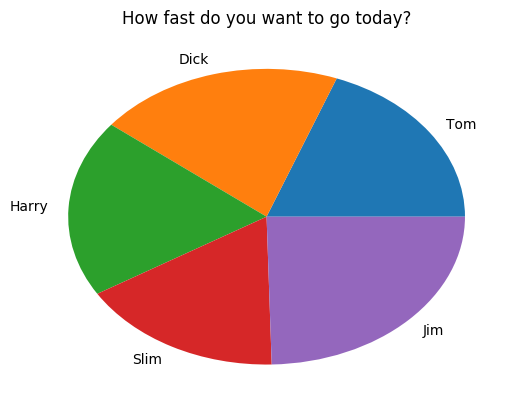

In [0]:
# Adapted to piechart
# https://matplotlib.org/gallery/pie_and_polar_charts/pie_features.html#sphx-glr-gallery-pie-and-polar-charts-pie-features-py

import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

ax.pie(performance, labels=people)
ax.set_title('How fast do you want to go today?')

plt.show()


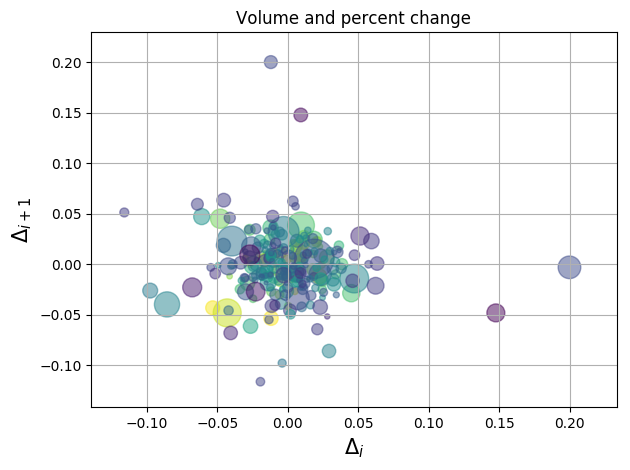

In [0]:
# https://matplotlib.org/gallery/lines_bars_and_markers/scatter_demo2.html#sphx-glr-gallery-lines-bars-and-markers-scatter-demo2-py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook

# Load a numpy record array from yahoo csv data with fields date, open, close,
# volume, adj_close from the mpl-data/example directory. The record array
# stores the date as an np.datetime64 with a day unit ('D') in the date column.
with cbook.get_sample_data('goog.npz') as datafile:
    price_data = np.load(datafile)['price_data'].view(np.recarray)
price_data = price_data[-250:]  # get the most recent 250 trading days

delta1 = np.diff(price_data.adj_close) / price_data.adj_close[:-1]

# Marker size in units of points^2
volume = (15 * price_data.volume[:-2] / price_data.volume[0])**2
close = 0.003 * price_data.close[:-2] / 0.003 * price_data.open[:-2]

fig, ax = plt.subplots()
ax.scatter(delta1[:-1], delta1[1:], c=close, s=volume, alpha=0.5)

ax.set_xlabel(r'$\Delta_i$', fontsize=15)
ax.set_ylabel(r'$\Delta_{i+1}$', fontsize=15)
ax.set_title('Volume and percent change')

ax.grid(True)
fig.tight_layout()

plt.show()

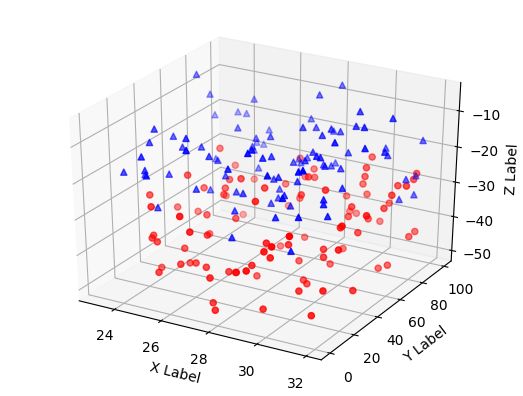

In [0]:
# https://matplotlib.org/gallery/mplot3d/scatter3d.html#sphx-glr-gallery-mplot3d-scatter3d-py
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


def randrange(n, vmin, vmax):
    '''
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    '''
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for c, m, zlow, zhigh in [('r', 'o', -50, -25), ('b', '^', -30, -5)]:
    xs = randrange(n, 23, 32)
    ys = randrange(n, 0, 100)
    zs = randrange(n, zlow, zhigh)
    ax.scatter(xs, ys, zs, c=c, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [3]:
#plot 1 get data

import pandas as pd
flag_data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.data'
flag_data = pd.read_csv(flag_data_url,header= None, names=['name',
'landmass',
'zone',
'area',
'population',
'language',
'religion',
'bars',
'stripes',
'colours',
'red',
'green',
'blue',
'gold',
'white',
'black',
'orange',
'mainhue',
'circles',
'crosses',
'saltires',
'quarters',
'sunstars',
'crescent',
'triangle',
'icon',
'animate',
'text',
'topleft',
'botright',
])

flag_data.head()


,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red


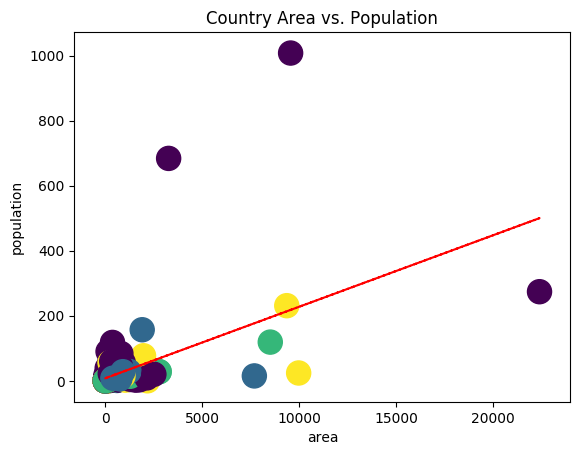

In [22]:
#plot 1 graph

area = flag_data.area
population = flag_data.population


x = area
y =population

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")


plt.scatter(area, population, s=300, c=flag_data.zone)
plt.title('Country Area vs. Population')
plt.xlabel('area')
plt.ylabel('population')
plt.show()


In [23]:
#plot 2 get data

!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip
!unzip Bike-Sharing-Dataset.zip
bike_df = pd.read_table('day.csv',sep=',')
bike_df.head()

--2019-01-09 19:52:42--  https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.249
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.249|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 279992 (273K) [application/zip]
Saving to: ‘Bike-Sharing-Dataset.zip’

Bike-Sharing-Datase 100%[===================>] 273.43K  1.06MB/s    in 0.3s    

2019-01-09 19:52:42 (1.06 MB/s) - ‘Bike-Sharing-Dataset.zip’ saved [279992/279992]

Archive:  Bike-Sharing-Dataset.zip
  inflating: Readme.txt              
  inflating: day.csv                 
  inflating: hour.csv                


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


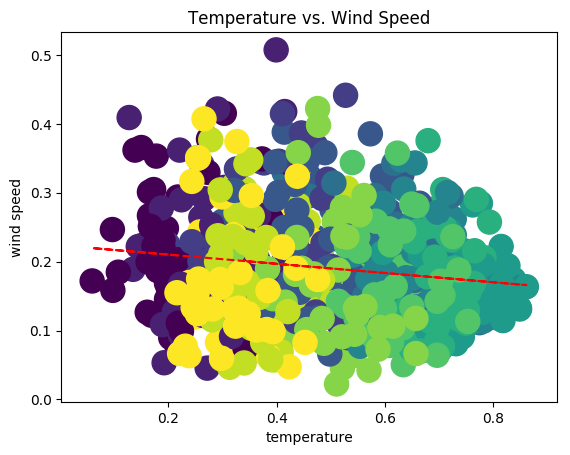

In [28]:
#plot 2 graph

temp = bike_df.temp
wind = bike_df.windspeed


x = temp
y = wind

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")


plt.scatter(temp, wind, s=300, c=bike_df.mnth)
plt.title('Temperature vs. Wind Speed')
plt.xlabel('temperature')
plt.ylabel('wind speed')
plt.show()

In [31]:
#plot 3 get data

drug_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00373/drug_consumption.data'
cols =['ID',
'Age',
'Gender',
'Education',
'Country',
'Ethnicity',
'Nscore',
'Escore',
'Oscore',
'Ascore',
'Cscore',
'Impulsive',
'SS',
'Alcohol',
'Amphet',
'Amyl',
'Benzos',
'Caff',
'Cannibis',
'Choc',
'Coke',
'Crack',
'Ecstasy',
'Heroine',
'Ketamine',
'Legalh',
'LSD',
'Meth',
'Mushrooms',
'Nicotine',
'Semer',
'VSA',
]


drug_data = pd.read_csv(drug_url, header=None,names = cols)
drug_data.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroine,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


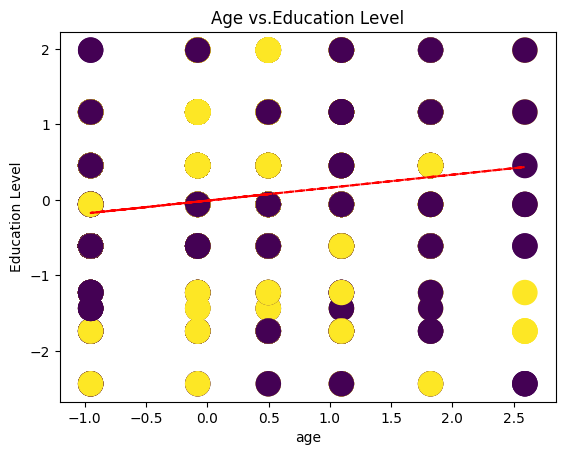

In [32]:
#plot 3 graph

age = drug_data.Age
education = drug_data.Education


x = age
y = education

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")


plt.scatter(age, education, s=300, c=drug_data.Gender)
plt.title('Age vs.Education Level')
plt.xlabel('age')
plt.ylabel('Education Level')
plt.show()

In [54]:
#stretch goal use hover

from bokeh.plotting import figure, output_file, show, ColumnDataSource, output_notebook

from bokeh.models import NumeralTickFormatter, HoverTool


data_url = ('https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data')
cols2 =['Sex',
'Length',
'Diameter',
'Height',
'Whole weight',
'Shucked weight',
'Viscera weight',
'Shell weight',
'Rings',]

df = pd.read_csv(data_url,header=None, names = cols2)
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [55]:
#hover graph

output_file('toolbar.html', title='Ring vs. Diameter')
output_notebook()

source = ColumnDataSource(df)

select_tools = ['box_select', 'lasso_select', 'poly_select', 'tap', 'reset']

fig = figure(plot_height=400,
             plot_width=600,
             x_axis_label='Abalone Diameter',
             y_axis_label='Abalone Rings',
             title='Ring vs. Diameter',
             toolbar_location='below',
             tools=select_tools)
            
            
fig.square(x='Diameter',
           y='Rings',
           source=source,
           color='royalblue',
           selection_color='deepskyblue',
           nonselection_color='lightgray',
           nonselection_alpha=0.3)

tooltips = [
            ('Sex','@Sex'),
            ('Diameter', '@Diameter'),
            ('Rings', '@Rings'),
            ('Length','@Length'),
           ]

# Add the HoverTool to the figure
fig.add_tools(HoverTool(tooltips=tooltips))



show(fig)


Loading BokehJS ...

In [0]:
#https://bokeh.pydata.org/en/latest/docs/user_guide/tools.html#hovertool
#https://realpython.com/python-data-visualization-bokeh/#adding-hover-actions